# Clustering

Our objective is to analyse IPL matches data and distribute batsmen and bowlers into clusters according to their batting and bowling performances.

This dataset contains players report card for IPL 2018 taken from IPL website. 

## Hierarchical Clustering

In [1]:
import pandas as pd

In [2]:
#Load the dataset
IPL = pd.read_csv("IPL 2018.csv")
IPL.head()

PLAYER  Not Outs  Runs scored  Highest score  Avg. run  \
0      Aaron Finch         1          134             46     16.75   
1   AB de Villiers         2          480             90     53.33   
2  Abhishek Sharma         2           63             46     63.00   
3   Ajinkya Rahane         1          370             65     28.46   
4       Alex Hales         0          148             45     24.66   

   Balls faced  Strike rate  100's  50's  Overs bowled   Runs given  Wkts  \
0          100       134.00      0     0            0.0           0     0   
1          275       174.54      0     6            0.0           0     0   
2           33       190.90      0     0            0.0           0     0   
3          313       118.21      0     1            0.0           0     0   
4          118       125.42      0     0            0.0           0     0   

   Avg. run given  Econ  Bowling strike rate  4w's  5w's  
0             0.0   0.0                  0.0     0     0  
1             0.0   0.0                  0.0     0     0  
2             0.0   0.0                  0.0     0     0  
3             0.0   0.0                  0.0     0     0  
4             0.0   0.0                  0.0     0     0

In [3]:
##Scaling the data
from sklearn.preprocessing import scale as scale
scaled_IPL = scale(IPL.iloc[:,1:17])
scaled_IPL

C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.1550601 ,  0.00943771,  0.40323538, ..., -0.98047992,
        -0.18172434, -0.08391814],
       [ 0.46087308,  1.98807763,  1.78437691, ..., -0.98047992,
        -0.18172434, -0.08391814],
       [ 0.46087308, -0.39658378,  0.40323538, ..., -0.98047992,
        -0.18172434, -0.08391814],
       ...,
       [-0.77099328, -0.75685636, -1.04068531, ...,  0.21042432,
        -0.18172434, -0.08391814],
       [-0.77099328, -0.75685636, -1.04068531, ..., -0.12183423,
        -0.18172434, -0.08391814],
       [-0.77099328, -0.75685636, -1.04068531, ...,  0.88614116,
        -0.18172434, -0.08391814]])

In [4]:
## Distance Computation
from scipy.spatial.distance import pdist, squareform
d_euc = pdist(scaled_IPL, metric  = "euclidean")
## Building the Clusters
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
clus1 = linkage(d_euc, method = "ward")

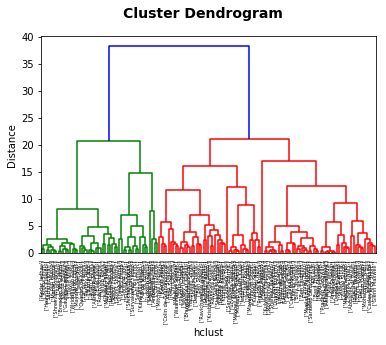

In [6]:
#Plot Cluster dendrogram
import matplotlib.pyplot as plt
dendrogram(clus1, 
           labels=IPL.iloc[:,[0]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', 
             fontweight='bold', fontsize=14)
plt.show()

In [7]:
## Profiling Step
IPL['Clusters'] = cut_tree(clus1, 3)
clus_profile = IPL.iloc[:,1:18].groupby(['Clusters'], as_index=False).mean()
clus_profile 

Clusters  Not Outs  Runs scored  Highest score   Avg. run  Balls faced  \
0         0  1.580000   293.360000      64.000000  29.890800   209.520000   
1         1  0.387755    20.591837      10.591837   7.576939    17.020408   
2         2  1.840909    73.840909      23.227273  12.987273    51.795455   

   Strike rate  100's      50's  Overs bowled   Runs given       Wkts  \
0   135.017000    0.1  1.880000       0.722000    6.180000   0.220000   
1    43.848367    0.0  0.020408      10.822449  103.775510   3.081633   
2   100.381364    0.0  0.136364      39.281818  323.409091  11.363636   

   Avg. run given      Econ  Bowling strike rate      4w's      5w's  
0         1.33660  0.461800             0.985000  0.000000  0.000000  
1        24.41551  9.914082            15.157143  0.000000  0.020408  
2        35.58000  8.449091            24.679318  0.181818  0.000000

## K means Clustering

In [9]:
#Read the data
IPL = pd.read_csv("IPL 2018.csv")

In [10]:
## Scaling
from sklearn.preprocessing import scale as scale
scaled_IPL = scale(IPL.iloc[:,1:17])

C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
## Identifying the optimal number of clusters 
# elbow method
cluster_range = range( 1, 6 )  ## number of iterations or number of clusters, here making 5 iterations , can take any number of iterations
cluster_wss = []

In [12]:
#Creating clusters
from sklearn.cluster import KMeans
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(scaled_IPL)
  cluster_wss.append( clusters.inertia_ )

In [13]:
#Check the Within cluster sum of squares for few clusters
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:5]

num_clusters  cluster_wss
0             1  2288.000000
1             2  1534.232687
2             3  1280.463438
3             4  1070.293968
4             5   927.851190

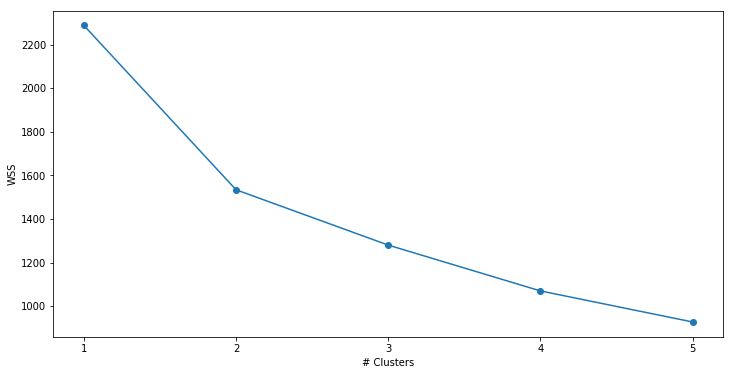

In [14]:
#Plot the wss values for first few clusters
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )
plt.show()

2 is the optimal number of clusters

In [15]:
## profiling the clusters
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_IPL)
cluster_labels
IPL['Clusters'] = cluster_labels

In [16]:
clus_profile = IPL.iloc[:,1:18].groupby(['Clusters'], 
                       as_index=False).mean()
clus_profile

Clusters  Not Outs  Runs scored  Highest score   Avg. run  Balls faced  \
0         0  0.966667    43.288889      15.655556   8.944000    31.677778   
1         1  1.735849   283.584906      62.867925  30.797925   202.603774   

   Strike rate    100's      50's  Overs bowled   Runs given      Wkts  \
0    68.042333  0.00000  0.066667      25.007778  213.700000  7.222222   
1   135.705472  0.09434  1.792453       0.832075    7.377358  0.226415   

   Avg. run given      Econ  Bowling strike rate      4w's      5w's  
0       30.043111  9.310556            19.984333  0.088889  0.011111  
1        2.355283  0.805472             1.495283  0.000000  0.000000

In [17]:
#Plot the clusters after applying PCA on dataset
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_IPL)

In [18]:
## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "blue"
   
   return 0

In [19]:
IPL['color'] = IPL.apply (lambda row: color_fun(row), axis=1)

plot_labels = IPL.iloc[:,[0]].values.ravel()

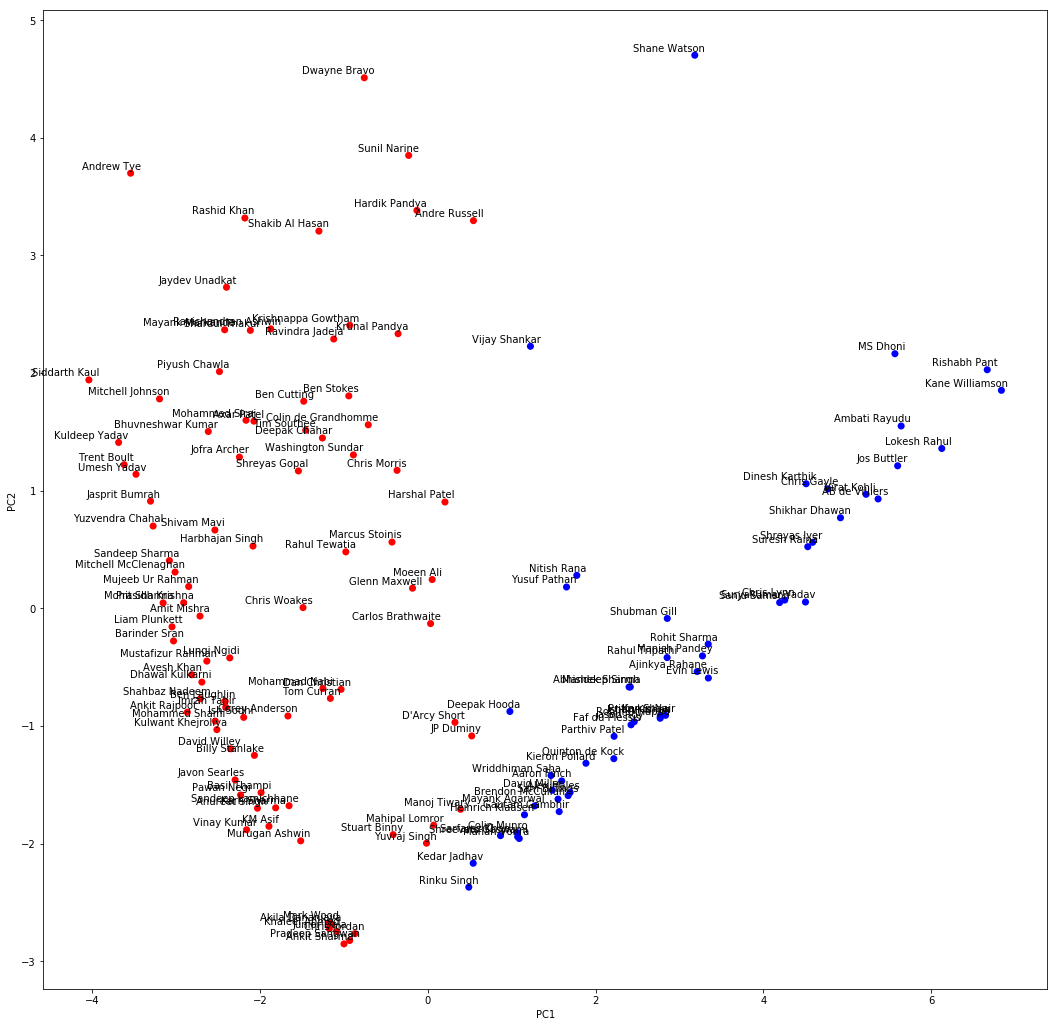

In [20]:
## Show the Cluster Plot
f,ax = plt.subplots(figsize=(18, 18))
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=IPL['color'].values.tolist(),
            s=50, edgecolors='none')
for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()